In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras import layers, models
from keras.preprocessing.image import ImageDataGenerator
import os
from keras.callbacks import EarlyStopping
import cv2

In [3]:
print("version: ",tf.__version__)
print(tf.config.list_physical_devices('GPU'))
print(tf.test.is_gpu_available())

version:  2.10.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
True


In [4]:
labels = pd.read_csv('ArSL_Data_Labels.csv')
labels.head()

,#,File_Name,Class
0,1,AIN (1).JPG,ain
1,2,AIN (10).JPG,ain
2,3,AIN (100).jpg,ain
3,4,AIN (1000).JPG,ain
4,5,AIN (1001).JPG,ain


In [5]:
labels.describe()

,#
count,54049.000000
mean,27025.000000
std,15602.746687
min,1.000000
25%,13513.000000
50%,27025.000000
75%,40537.000000
max,54049.000000


In [15]:
class_labels = labels['Class'].unique()
print(class_labels)

['ain' 'al' 'aleff' 'bb' 'dal' 'dha' 'dhad' 'fa' 'gaaf' 'ghain' 'ha' 'haa'
 'jeem' 'kaaf' 'khaa' 'la' 'laam' 'meem' 'nun' 'ra' 'saad' 'seen' 'sheen'
 'ta' 'taa' 'thaa' 'thal' 'toot' 'waw' 'ya' 'yaa' 'zay']


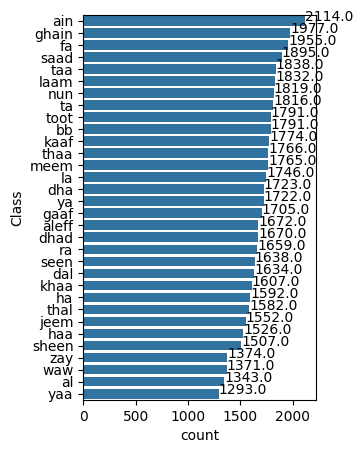

In [9]:
#function to show bar length
def barw(ax): 
    
    for p in ax.patches:
        val = p.get_width() #height of the bar
        x = p.get_x()+ p.get_width() # x- position 
        y = p.get_y() + p.get_height()/2 #y-position
        ax.annotate(round(val,2),(x,y))
        


plt.figure(figsize = (3,5))
ax0 =sns.countplot(y=labels['Class'],order=labels['Class'].value_counts().index)
barw(ax0)
plt.show()

In [10]:
import os
from sklearn.model_selection import train_test_split
import shutil

# Set the path to your main data folder containing subfolders for each class
data_folder = 'ArASL_Database_54K_Final'

# Create empty folders for the training and validation sets
train_folder = 'Train'
val_folder = 'val'

os.makedirs(train_folder, exist_ok=True)
os.makedirs(val_folder, exist_ok=True)

# Get the list of subfolders (each subfolder represents a class)
classes = os.listdir(data_folder)

# Loop through each class and split the data
for class_name in classes:
    class_folder = os.path.join(data_folder, class_name)
    images = os.listdir(class_folder)
    
    # Split the images for each class into train and validation sets
    train_images, val_images = train_test_split(images, test_size=0.2, random_state=42)
    
    # Move images to the corresponding train and validation folders
    for image in train_images:
        src_path = os.path.join(class_folder, image)
        dest_path = os.path.join(train_folder, class_name, image)
        os.makedirs(os.path.dirname(dest_path), exist_ok=True)
        shutil.copy(src_path, dest_path)
    
    for image in val_images:
        src_path = os.path.join(class_folder, image)
        dest_path = os.path.join(val_folder, class_name, image)
        os.makedirs(os.path.dirname(dest_path), exist_ok=True)
        shutil.copy(src_path, dest_path)


In [13]:
import cv2
import os

# Specify the path to the folder containing your images
image_folder = 'Train/aleff/'

# List all image files in the folder
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.jpeg', '.png', '.bmp'))]

# Loop through each image file and print its properties
for image_file in image_files:
    image_path = os.path.join(image_folder, image_file)

    # Read the image using OpenCV
    image = cv2.imread(image_path)

    # Get width, height, and number of channels
    height, width, channels = image.shape

    # Print the information
    print(f"Image: {image_file}")
    print(f"Width: {width}, Height: {height}, Channels: {channels}")
    print("")

    # Optionally, you can display the image using OpenCV if needed
    # cv2.imshow('Image', image)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()


Image: Aleff (100).jpg
Width: 64, Height: 64, Channels: 3

Image: Aleff (1000).jpg
Width: 64, Height: 64, Channels: 3

Image: Aleff (1001).jpg
Width: 64, Height: 64, Channels: 3

Image: Aleff (1002).jpg
Width: 64, Height: 64, Channels: 3

Image: Aleff (1003).jpg
Width: 64, Height: 64, Channels: 3

Image: Aleff (1004).jpg
Width: 64, Height: 64, Channels: 3

Image: Aleff (1005).jpg
Width: 64, Height: 64, Channels: 3

Image: Aleff (1006).jpg
Width: 64, Height: 64, Channels: 3

Image: Aleff (1007).jpg
Width: 64, Height: 64, Channels: 3

Image: Aleff (1008).jpg
Width: 64, Height: 64, Channels: 3

Image: Aleff (1009).jpg
Width: 64, Height: 64, Channels: 3

Image: Aleff (101).jpg
Width: 64, Height: 64, Channels: 3

Image: Aleff (1010).jpg
Width: 64, Height: 64, Channels: 3

Image: Aleff (1012).jpg
Width: 64, Height: 64, Channels: 3

Image: Aleff (1013).jpg
Width: 64, Height: 64, Channels: 3

Image: Aleff (1014).jpg
Width: 64, Height: 64, Channels: 3

Image: Aleff (1015).jpg
Width: 64, Height:

In [19]:



# Define image size and batch size
img_size = (64,64)
batch_size = 128

# Create ImageDataGenerator instances
train_datagen = ImageDataGenerator(rescale=1./255,horizontal_flip=True,shear_range=0.2)
val_datagen = ImageDataGenerator(rescale=1./255,horizontal_flip=True,shear_range=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create generators for training, validation, and testing data
train_generator = train_datagen.flow_from_directory(
    directory='Train',
    color_mode='rgb',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    directory='val',
    color_mode='rgb',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Set to False for validation
)

test_generator = test_datagen.flow_from_directory(
    directory='val',
    color_mode='rgb',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Set to False for testing
)


Found 43225 images belonging to 32 classes.
Found 10824 images belonging to 32 classes.
Found 10824 images belonging to 32 classes.


In [20]:
# Example: Build and train a simple CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(32, activation='softmax')  
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
history = model.fit(train_generator, epochs=15, validation_data=val_generator, callbacks=[early_stopping])


# Evaluate on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc}, Test loss: {test_loss}')

Epoch 1/15
338/338 [==============================] - 247s 716ms/step - loss: 2.8482 - accuracy: 0.2049 - val_loss: 2.7859 - val_accuracy: 0.4435
Epoch 2/15
338/338 [==============================] - 57s 168ms/step - loss: 1.5922 - accuracy: 0.5132 - val_loss: 1.3642 - val_accuracy: 0.5893
Epoch 3/15
338/338 [==============================] - 60s 177ms/step - loss: 1.0645 - accuracy: 0.6637 - val_loss: 0.8135 - val_accuracy: 0.7584
Epoch 4/15
338/338 [==============================] - 57s 169ms/step - loss: 0.8038 - accuracy: 0.7472 - val_loss: 0.7169 - val_accuracy: 0.7916
Epoch 5/15
338/338 [==============================] - 57s 170ms/step - loss: 0.6406 - accuracy: 0.8032 - val_loss: 0.4242 - val_accuracy: 0.8935
Epoch 6/15
338/338 [==============================] - 58s 170ms/step - loss: 0.5351 - accuracy: 0.8382 - val_loss: 0.3626 - val_accuracy: 0.9035
Epoch 7/15
338/338 [==============================] - 57s 169ms/step - loss: 0.4561 - accuracy: 0.8650 - val_loss: 0.3198 - val_a

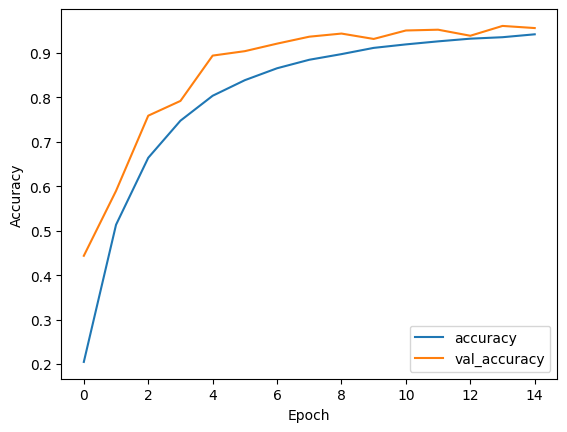

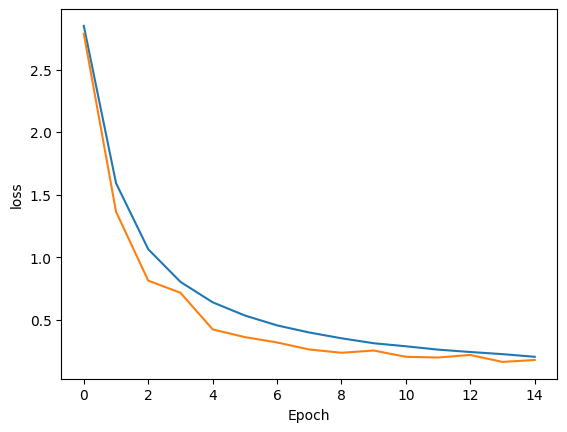

In [21]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'],label='training loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.show()

In [23]:
from sklearn.metrics import classification_report

# Directory containing the test dataset
test_dir = r'val'

# List of emotion folders (0, 1, 2, 3, 4, 5, 6)
emotion_folders = class_labels

# Load the trained model


# Initialize variables to store true labels and predicted labels
true_labels = []
predicted_labels = []



# Iterate through each emotion folder in the test dataset
for emotion_folder in emotion_folders:
    folder_path = os.path.join(test_dir, emotion_folder)

   
    # Make predictions using the model
    predictions = model.predict(test_generator)

    # Get the predicted class index for each image
    predicted_class_indices = np.argmax(predictions, axis=1)

    # Get the true class labels
    true_labels.extend(test_generator.classes)
    predicted_labels.extend(predicted_class_indices)

# Generate and print the classification report
report = classification_report(true_labels, predicted_labels, target_names=emotion_folders)
print(report)

85/85 [==============================] - 4s 43ms/step
              precision    recall  f1-score   support

         ain       0.98      0.99      0.98     13536
          al       0.96      0.98      0.97      8608
       aleff       0.98      0.96      0.97     10720
          bb       0.93      0.98      0.96     11488
         dal       0.98      0.94      0.96     10464
         dha       0.96      0.95      0.96     11040
        dhad       1.00      0.96      0.98     10688
          fa       0.96      0.87      0.91     12512
        gaaf       0.90      0.90      0.90     10912
       ghain       1.00      0.95      0.97     12672
          ha       0.87      0.93      0.90     10208
         haa       0.98      0.95      0.96      9792
        jeem       0.98      0.94      0.96      9952
        kaaf       0.93      0.99      0.96     11360
        khaa       0.98      0.93      0.96     10304
          la       0.89      0.99      0.94     11200
        laam       0.97    

In [24]:
# Save the model in the HDF5 format
model.save('model')

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


1/1 [==============================] - 0s 95ms/step
Ain: 48.91%
Al: 0.00%
Aleff: 4.51%
Bb: 2.06%
Dal: 0.00%
Dha: 0.00%
Dhad: 0.01%
Fa: 0.01%
Gaaf: 0.00%
Ghain: 44.05%
Ha: 0.00%
Haa: 0.00%
Jeem: 0.00%
Kaaf: 0.00%
Khaa: 0.00%
La: 0.01%
Laam: 0.00%
Meem: 0.01%
Nun: 0.01%
Ra: 0.02%
Saad: 0.02%
Seen: 0.02%
Sheen: 0.00%
Ta: 0.01%
Taa: 0.01%
Thaa: 0.03%
Thal: 0.00%
Toot: 0.00%
Waw: 0.06%
Ya: 0.00%
Yaa: 0.23%
Zay: 0.00%


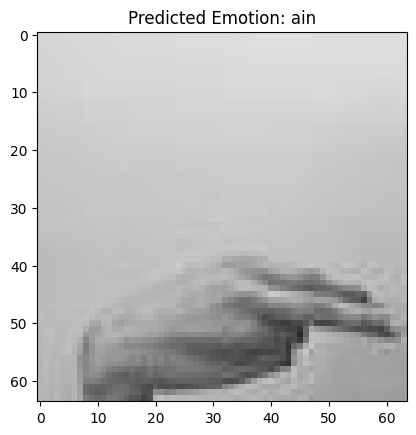

In [27]:
# Assuming you've already loaded the model
# If you haven't loaded it, you can use:
model = tf.keras.models.load_model('model')

# Make predictions on a single image (you can adjust the path accordingly)
image_path = r'val/ain/AIN (101).jpg'
img = tf.keras.preprocessing.image.load_img(image_path, target_size=(64, 64))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Add batch dimension

# Preprocess the image
img_array = img_array / 255.0  # Normalize pixel values

# Make predictions
predictions = model.predict(img_array)

# Get the predicted class index
predicted_class_index = np.argmax(predictions)

# Map the index to the corresponding emotion label
emotion_labels = class_labels
predicted_emotion = emotion_labels[predicted_class_index]
for label, score in zip(emotion_labels, predictions[0]):
    print(f"{label.capitalize()}: {score * 100:.2f}%")
# Visualize the image
plt.imshow(img)
plt.title(f'Predicted Emotion: {predicted_emotion}')
plt.show()

1/1 [==============================] - 0s 22ms/step


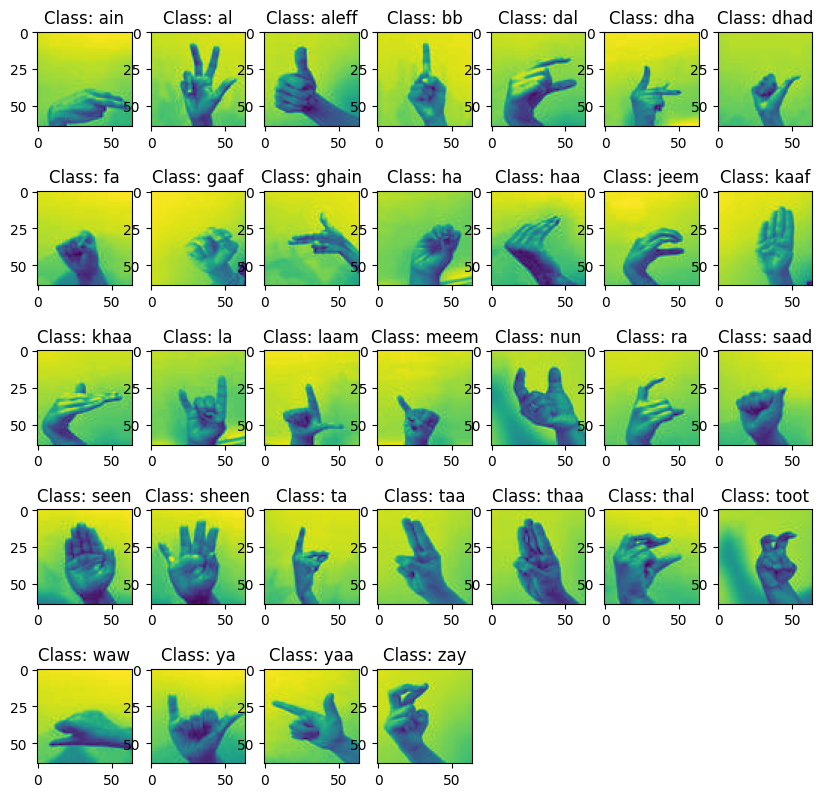

In [32]:

import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

def load_trained_model(model_path):
    model = tf.keras.models.load_model(model_path)
    return model

def load_one_image_per_class(data_dir):
    class_images = {}
    for class_name in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_name)
        image_files = [file for file in os.listdir(class_path) if file.endswith('.jpg')]
        if image_files:
            image_path = os.path.join(class_path, image_files[0])
            image = tf.keras.preprocessing.image.load_img(image_path, target_size=(64, 64))
            image = tf.keras.preprocessing.image.img_to_array(image)
            image = np.expand_dims(image, axis=0)
            image = image / 255.0  # Normalize the image
            class_images[class_name] = (image, plt.imread(image_path))
    return class_images

def make_predictions(model, class_images):
    predictions = {}
    for class_name, (image, _) in class_images.items():
        prediction = model.predict(image)
        predicted_class_index = np.argmax(prediction)
        predictions[class_name] = predicted_class_index
    return predictions

def display_predictions(predictions, class_images):
    n = len(predictions)
    rows = int(np.sqrt(n))
    cols = int(np.ceil(n / rows))

    # setup the figure
    plt.figure(figsize=(10, 10))

    for i, (class_name, predicted_class_index) in enumerate(predictions.items()):
        _, image = class_images[class_name]
        ax = plt.subplot(rows, cols, i + 1)
        plt.title(f"Class: {class_name}")
        plt.imshow(image.astype('int32'))

    plt.show()

if __name__ == "__main__":
    model_path = "model"
    data_dir = "val"

    model = load_trained_model(model_path)
    class_images = load_one_image_per_class(data_dir)
    predictions = make_predictions(model, class_images)
    display_predictions(predictions, class_images)
